In [4]:
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from sklearn.impute import KNNImputer
from pathlib import Path
from sklearn import svm
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import missingno as mno
from sklearn.svm import SVC

In [494]:
# read dataset
df = pd.read_csv('C:\\Users\Cagri ERBEY\Desktop\On_Time_50.csv')
print("Dataset information", df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49101 entries, 0 to 49100
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  49101 non-null  int64  
 1   Quarter               49101 non-null  int64  
 2   Month                 49101 non-null  int64  
 3   DayofMonth            49101 non-null  int64  
 4   DayOfWeek             49101 non-null  int64  
 5   FlightDate            49101 non-null  object 
 6   UniqueCarrier         49101 non-null  object 
 7   TailNum               49042 non-null  object 
 8   FlightNum             49101 non-null  int64  
 9   Origin                49101 non-null  object 
 10  OriginCityName        49101 non-null  object 
 11  OriginState           49101 non-null  object 
 12  OriginStateFips       49101 non-null  int64  
 13  OriginStateName       49101 non-null  object 
 14  Dest                  49101 non-null  object 
 15  DestCityName       

In [495]:
df.drop(['Year','Quarter','Month', 'OriginState', 'Origin', 'Dest', 'DestState', 'CancellationCode', 'Diverted', 'FlightDate', 'TailNum', 'FlightNum', 'OriginStateFips', 'DestStateFips', 'DepDelay', 'TaxiOut', 'TaxiIn', 'DistanceGroup', 'WheelsOff', 'WheelsOn','AirTime' , 'DepDelayMinutes', 'ArrivalDelayGroups', 'ArrDelayMinutes', 'DepartureDelayGroups', 'ArrTime', 'ArrDelay', 'DepTime', 'CRSDepTime', 'CRSArrTime'   ], inplace=True, axis=1)

In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49101 entries, 0 to 49100
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DayofMonth         49101 non-null  int64  
 1   DayOfWeek          49101 non-null  int64  
 2   UniqueCarrier      49101 non-null  object 
 3   OriginCityName     49101 non-null  object 
 4   OriginStateName    49101 non-null  object 
 5   DestCityName       49101 non-null  object 
 6   DestStateName      49101 non-null  object 
 7   DepDel15           48599 non-null  float64
 8   DepTimeBlk         49101 non-null  object 
 9   ArrDel15           48495 non-null  float64
 10  ArrTimeBlk         49101 non-null  object 
 11  Cancelled          49101 non-null  int64  
 12  CRSElapsedTime     49101 non-null  int64  
 13  Distan             48495 non-null  float64
 14  Distance           49101 non-null  int64  
 15  CarrierDelay       9124 non-null   float64
 16  WeatherDelay       912

In [497]:
df['DepTimeBlk'] = df['DepTimeBlk'].str.slice(0, 2)
df["DepTimeBlk"] = df["DepTimeBlk"].astype(str).astype(int)
df['ArrTimeBlk'] = df['ArrTimeBlk'].str.slice(0, 2)
df["ArrTimeBlk"] = df["ArrTimeBlk"].astype(str).astype(int)

In [498]:
df["OriginCityName"] = df["OriginCityName"].str.slice(stop=-4)
df["DestCityName"] = df["DestCityName"].str.slice(stop=-4)

In [499]:
df.drop(['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], inplace=True, axis=1)

In [500]:
df.drop(['DayofMonth', 'DayOfWeek', 'DepDel15', 'DepTimeBlk', 'ArrDel15', 'Cancelled'], inplace=True, axis=1)

In [501]:
df.rename(columns = {'Distan':'FlightLength'}, inplace = True)

In [502]:
df.drop(['ArrTimeBlk' , 'CRSElapsedTime'], inplace=True, axis=1)

In [503]:
df.drop(['UniqueCarrier'], inplace=True, axis=1)

In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49101 entries, 0 to 49100
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OriginCityName   49101 non-null  object 
 1   OriginStateName  49101 non-null  object 
 2   DestCityName     49101 non-null  object 
 3   DestStateName    49101 non-null  object 
 4   FlightLength     48495 non-null  float64
 5   Distance         49101 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 2.2+ MB


<AxesSubplot:>

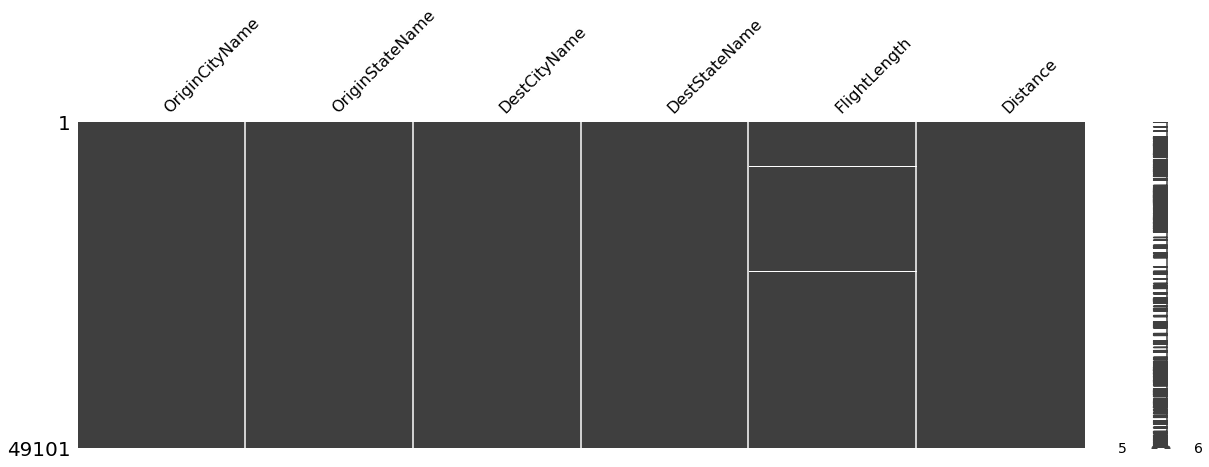

In [505]:
#missing value matrix
mno.matrix(df, figsize = (20, 6))

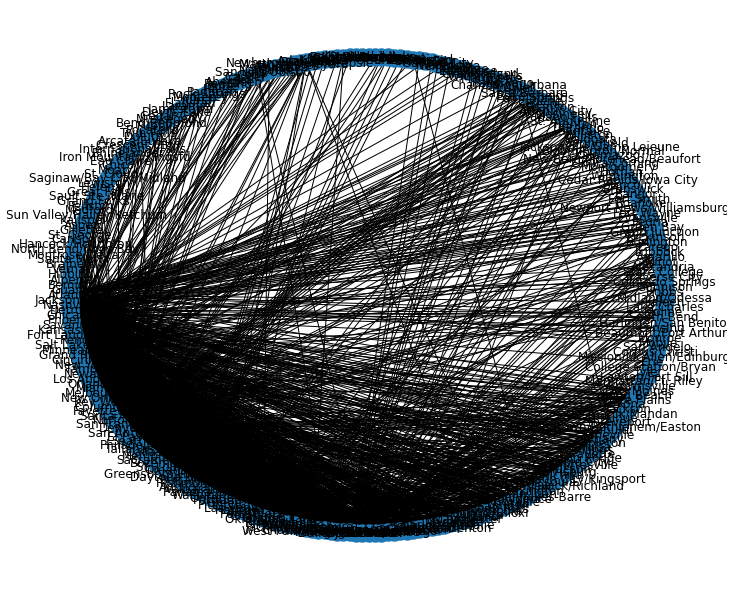

In [506]:
G = nx.Graph()

df1 = df[['OriginCityName', 'DestCityName']]
G = nx.Graph()
G = nx.from_pandas_edgelist(df1, 'OriginCityName', 'DestCityName')

from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

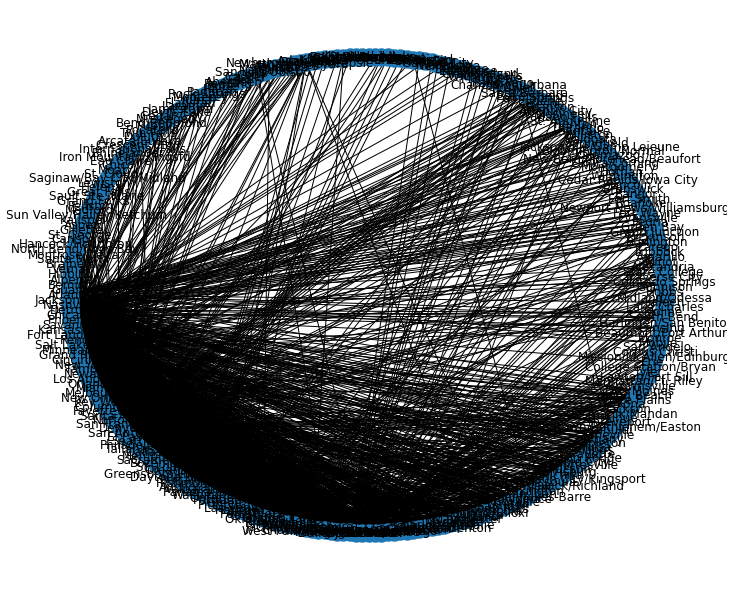

In [507]:
G = nx.Graph()

df1 = df[['OriginCityName', 'DestCityName', 'Distance']]
G = nx.Graph()
G = nx.from_pandas_edgelist(df1, 'OriginCityName', 'DestCityName', 'Distance')

from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

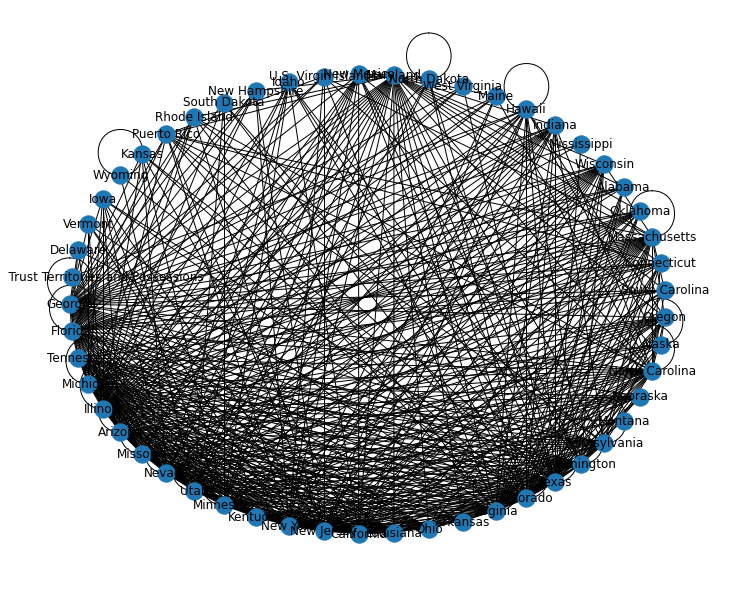

In [508]:
G = nx.Graph()

df1 = df[['OriginStateName', 'DestStateName']]
G = nx.Graph()
G = nx.from_pandas_edgelist(df1, 'OriginStateName', 'DestStateName')

from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

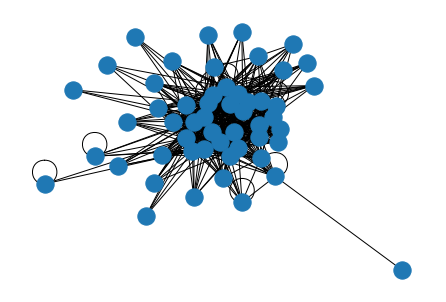

In [509]:
nx.draw(G)

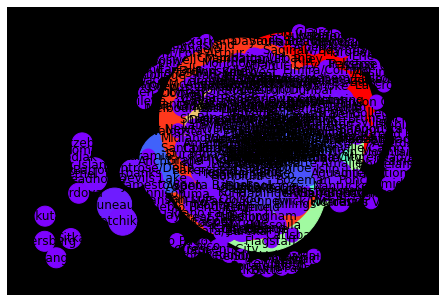

In [510]:
from matplotlib import pyplot as plt


G = nx.from_pandas_edgelist(
    df,
    source='OriginCityName',
    target='DestCityName',
    edge_attr='Distance'  # Set Edge Attribute to Weight Column
)

# Get Degree values and scale
scaled_degree = [d[1] * 200 for d in nx.degree(G)]
nx.draw(G,
        # Weights Based on Column
        width=list(nx.get_edge_attributes(G, 'Distance').values()),
        # Node size based on degree
        node_size=scaled_degree,
        # Colour Based on Degree
        node_color=scaled_degree,
        # Set color map to determine colours
        cmap='rainbow',
        with_labels=True)

plt.show()

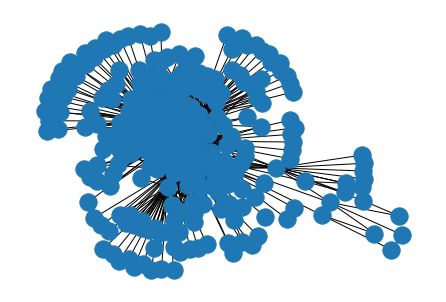

In [511]:
nx.draw(G)

In [512]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.04030900495791537


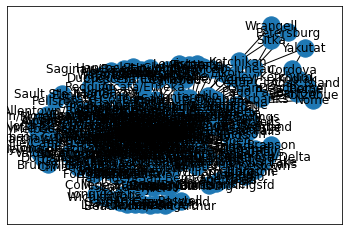

In [513]:
nx.draw_networkx(G, with_labels=True)

In [514]:
list(G.nodes)

['Atlanta',
 'Jacksonville',
 'Nashville',
 'Detroit',
 'Chicago',
 'Phoenix',
 'Savannah',
 'Kansas City',
 'Fort Lauderdale',
 'Reno',
 'Salt Lake City',
 'Minneapolis',
 'Grand Rapids',
 'Cincinnati',
 'New York',
 'Tampa',
 'Newark',
 'Los Angeles',
 'Orlando',
 'Miami',
 'Melbourne',
 'New Orleans',
 'Key West',
 'Columbus',
 'Fayetteville',
 'Santa Ana',
 'Norfolk',
 'San Francisco',
 'Denver',
 'San Antonio',
 'El Paso',
 'Seattle',
 'Philadelphia',
 'Tallahassee',
 'Dallas',
 'Memphis',
 'Sacramento',
 'Bozeman',
 'St. Louis',
 'Omaha',
 'Greensboro/High Point',
 'Daytona Beach',
 'Buffalo',
 'Richmond',
 'Anchorage',
 'Valparaiso',
 'Panama City',
 'Washington',
 'Ontario',
 'Portland',
 'Greer',
 'Pittsburgh',
 'Las Vegas',
 'Hartford',
 'Austin',
 'Fort Myers',
 'Charlotte',
 'Boston',
 'Oklahoma City',
 'Louisville',
 'Birmingham',
 'Huntsville',
 'Milwaukee',
 'Jackson/Vicksburg',
 'Indianapolis',
 'Honolulu',
 'Charleston/Dunbar',
 'Chattanooga',
 'West Palm Beach/Palm Be

In [515]:
G.edges()

EdgeView([('Atlanta', 'Jacksonville'), ('Atlanta', 'Nashville'), ('Atlanta', 'Phoenix'), ('Atlanta', 'Savannah'), ('Atlanta', 'Kansas City'), ('Atlanta', 'Fort Lauderdale'), ('Atlanta', 'Cincinnati'), ('Atlanta', 'Newark'), ('Atlanta', 'New York'), ('Atlanta', 'Melbourne'), ('Atlanta', 'Chicago'), ('Atlanta', 'Key West'), ('Atlanta', 'Columbus'), ('Atlanta', 'Fayetteville'), ('Atlanta', 'Norfolk'), ('Atlanta', 'San Antonio'), ('Atlanta', 'El Paso'), ('Atlanta', 'Seattle'), ('Atlanta', 'Tallahassee'), ('Atlanta', 'Dallas'), ('Atlanta', 'Denver'), ('Atlanta', 'Detroit'), ('Atlanta', 'St. Louis'), ('Atlanta', 'Memphis'), ('Atlanta', 'Greensboro/High Point'), ('Atlanta', 'Daytona Beach'), ('Atlanta', 'Buffalo'), ('Atlanta', 'Richmond'), ('Atlanta', 'Valparaiso'), ('Atlanta', 'Panama City'), ('Atlanta', 'Greer'), ('Atlanta', 'Pittsburgh'), ('Atlanta', 'Orlando'), ('Atlanta', 'Tampa'), ('Atlanta', 'Fort Myers'), ('Atlanta', 'Charlotte'), ('Atlanta', 'Austin'), ('Atlanta', 'Oklahoma City'), (

In [516]:
nx.algorithms.degree_centrality(G)

{'Atlanta': 0.4659863945578231,
 'Jacksonville': 0.05442176870748299,
 'Nashville': 0.1326530612244898,
 'Detroit': 0.2891156462585034,
 'Chicago': 0.48639455782312924,
 'Phoenix': 0.24489795918367346,
 'Savannah': 0.030612244897959183,
 'Kansas City': 0.10544217687074829,
 'Fort Lauderdale': 0.12585034013605442,
 'Reno': 0.030612244897959183,
 'Salt Lake City': 0.2755102040816326,
 'Minneapolis': 0.2857142857142857,
 'Grand Rapids': 0.03741496598639456,
 'Cincinnati': 0.09523809523809523,
 'New York': 0.2585034013605442,
 'Tampa': 0.1564625850340136,
 'Newark': 0.2312925170068027,
 'Los Angeles': 0.23809523809523808,
 'Orlando': 0.2074829931972789,
 'Miami': 0.1564625850340136,
 'Melbourne': 0.003401360544217687,
 'New Orleans': 0.09863945578231292,
 'Key West': 0.006802721088435374,
 'Columbus': 0.06802721088435373,
 'Fayetteville': 0.027210884353741496,
 'Santa Ana': 0.05442176870748299,
 'Norfolk': 0.04081632653061224,
 'San Francisco': 0.22448979591836735,
 'Denver': 0.44557823129

In [517]:
nx.average_shortest_path_length(G)

2.4159345093969793

In [518]:
nx.average_degree_connectivity(G)

{137: 21.27007299270073,
 16: 70.35416666666667,
 39: 54.87179487179487,
 85: 29.68235294117647,
 143: 20.846153846153847,
 72: 36.18055555555556,
 9: 90.80555555555556,
 31: 64.90322580645162,
 37: 55.090090090090094,
 81: 28.950617283950617,
 84: 30.94047619047619,
 11: 80.96363636363637,
 28: 65.64285714285714,
 76: 34.05263157894737,
 46: 45.55434782608695,
 68: 35.5735294117647,
 70: 36.5,
 61: 38.721311475409834,
 1: 109.95833333333333,
 29: 66.94827586206897,
 2: 80.94444444444444,
 20: 76.25,
 8: 81.9375,
 12: 82.125,
 66: 37.17424242424242,
 131: 22.015267175572518,
 24: 68.33333333333333,
 56: 42.839285714285715,
 3: 94.83333333333333,
 26: 48.0,
 15: 70.16666666666667,
 23: 66.43478260869566,
 4: 103.78947368421052,
 40: 55.175,
 14: 86.54285714285714,
 10: 78.83333333333333,
 19: 60.87719298245614,
 13: 74.07692307692308,
 36: 53.916666666666664,
 7: 100.80952380952381,
 71: 37.36619718309859,
 32: 59.6875,
 55: 43.872727272727275,
 49: 47.734693877551024,
 17: 84.470588235

In [519]:
ShortestCityPath = nx.dijkstra_path(G, source="Grand Forks", target="El Paso", weight='FlightLength')
print("Shortest path between Origin and Dest:", ShortestCityPath)

Shortest path between Origin and Dest: ['Grand Forks', 'Minneapolis', 'Los Angeles', 'El Paso']


In [520]:
ShortestCityPath = nx.astar_path(G, source="Grand Forks", target="El Paso", heuristic=None, weight='FlightLength')
print("Shortest path between Origin and Dest:", ShortestCityPath)

Shortest path between Origin and Dest: ['Grand Forks', 'Minneapolis', 'Los Angeles', 'El Paso']


In [521]:
ShortestCityPath = nx.shortest_path(G, source="Grand Forks", target="El Paso", method='bellman-ford',weight='FlightLength')
print("Shortest path between Origin and Dest:", ShortestCityPath)

Shortest path between Origin and Dest: ['Grand Forks', 'Minneapolis', 'Los Angeles', 'El Paso']


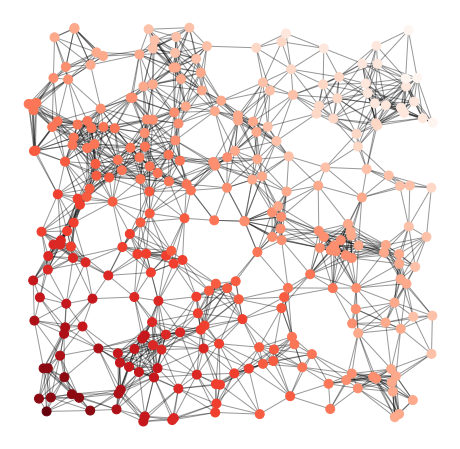

In [522]:
G = nx.random_geometric_graph(293, 0.125)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, 'pos')

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5)*2 + (y - 0.5)*2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Reds_r)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

In [523]:
#G.remove_edge("Minneapolis", "Sioux Falls")

In [5]:
# read dataset
df = pd.read_csv('On_Time_50.csv')
print("Dataset information", df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49101 entries, 0 to 49100
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  49101 non-null  int64  
 1   Quarter               49101 non-null  int64  
 2   Month                 49101 non-null  int64  
 3   DayofMonth            49101 non-null  int64  
 4   DayOfWeek             49101 non-null  int64  
 5   FlightDate            49101 non-null  object 
 6   UniqueCarrier         49101 non-null  object 
 7   TailNum               49042 non-null  object 
 8   FlightNum             49101 non-null  int64  
 9   Origin                49101 non-null  object 
 10  OriginCityName        49101 non-null  object 
 11  OriginState           49101 non-null  object 
 12  OriginStateFips       49101 non-null  int64  
 13  OriginStateName       49101 non-null  object 
 14  Dest                  49101 non-null  object 
 15  DestCityName       

In [6]:
df.rename(columns = {'Distan':'FlightLength'}, inplace = True)

In [7]:
df.drop(['Year','Quarter','Month', 'OriginState', 'Origin', 'Dest', 'DestState', 'CancellationCode', 'Diverted', 'FlightDate', 'TailNum', 'FlightNum', 'OriginStateFips', 'DestStateFips', 'DepDelay', 'TaxiOut', 'TaxiIn', 'DistanceGroup', 'WheelsOff', 'WheelsOn','AirTime' , 'DepDelayMinutes', 'ArrivalDelayGroups', 'ArrDelayMinutes', 'DepartureDelayGroups', 'ArrTime', 'ArrDelay', 'DepTime', 'CRSDepTime', 'CRSArrTime'   ], inplace=True, axis=1)

In [8]:
df['DepTimeBlk'] = df['DepTimeBlk'].str.slice(0, 2)
df["DepTimeBlk"] = df["DepTimeBlk"].astype(str).astype(int)
df['ArrTimeBlk'] = df['ArrTimeBlk'].str.slice(0, 2)
df["ArrTimeBlk"] = df["ArrTimeBlk"].astype(str).astype(int)

In [9]:
df["OriginCityName"] = df["OriginCityName"].str.slice(stop=-4)
df["DestCityName"] = df["DestCityName"].str.slice(stop=-4)

In [10]:
# df['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'] = df['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'].fillna(0)
df['CarrierDelay'] = df['CarrierDelay'].fillna(0)
df['WeatherDelay'] = df['WeatherDelay'].fillna(0)
df['NASDelay'] = df['NASDelay'].fillna(0)
df['SecurityDelay'] = df['SecurityDelay'].fillna(0)
df['LateAircraftDelay'] = df['LateAircraftDelay'].fillna(0)

In [11]:
df = df.sort_values('OriginCityName')
df['NewOriginCityName'] = pd.factorize(df.OriginCityName)[0] + 1
df = df.sort_values('DestCityName')
df['NewDestCityName'] = pd.factorize(df.DestCityName)[0] + 1

In [12]:
df = df.sort_values('DestStateName')
df['NewDestStateName'] = pd.factorize(df.DestStateName)[0] + 1
df = df.sort_values('OriginStateName')
df['NewOriginStateName'] = pd.factorize(df.OriginStateName)[0] + 1

In [13]:
df = df.sort_values('UniqueCarrier')
df['NewUniqueCarrier'] = pd.factorize(df.UniqueCarrier)[0] + 1

In [14]:
df.loc[df['OriginCityName'] == 'Grand Forks']

,DayofMonth,DayOfWeek,UniqueCarrier,OriginCityName,OriginStateName,DestCityName,DestStateName,DepDel15,DepTimeBlk,ArrDel15,...,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,NewOriginCityName,NewDestCityName,NewDestStateName,NewOriginStateName,NewUniqueCarrier
39514,1,3,OO,Grand Forks,North Dakota,Minneapolis,Minnesota,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,105,179,23,34,10


In [15]:
df.drop(['OriginCityName', 'DestCityName', 'DestStateName','OriginStateName' , 'UniqueCarrier', ], inplace=True, axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49101 entries, 15342 to 36143
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DayofMonth          49101 non-null  int64  
 1   DayOfWeek           49101 non-null  int64  
 2   DepDel15            48599 non-null  float64
 3   DepTimeBlk          49101 non-null  int32  
 4   ArrDel15            48495 non-null  float64
 5   ArrTimeBlk          49101 non-null  int32  
 6   Cancelled           49101 non-null  int64  
 7   CRSElapsedTime      49101 non-null  int64  
 8   FlightLength        48495 non-null  float64
 9   Distance            49101 non-null  int64  
 10  CarrierDelay        49101 non-null  float64
 11  WeatherDelay        49101 non-null  float64
 12  NASDelay            49101 non-null  float64
 13  SecurityDelay       49101 non-null  float64
 14  LateAircraftDelay   49101 non-null  float64
 15  NewOriginCityName   49101 non-null  int64  
 16  

In [17]:
df.drop([39514], axis=0, inplace=True)

In [18]:
df.drop(['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], inplace=True, axis=1)

In [19]:
df['FlightLength'] = df['FlightLength'].apply(np.floor)

In [20]:
df.loc[df['DepDel15'] > 0, 'DepDel15'] = 1
df.loc[df['ArrDel15'] > 0, 'ArrDel15'] = 1

In [21]:
df["Del15"] = df["ArrDel15"] + df["DepDel15"]

In [22]:
df.loc[df['Del15'] > 0, 'Del15'] = 1

In [23]:
df.Del15.value_counts()

0.0    37892
1.0    10602
Name: Del15, dtype: int64

In [24]:
df.drop(['ArrDel15','DepDel15'], inplace=True, axis=1)

<AxesSubplot:>

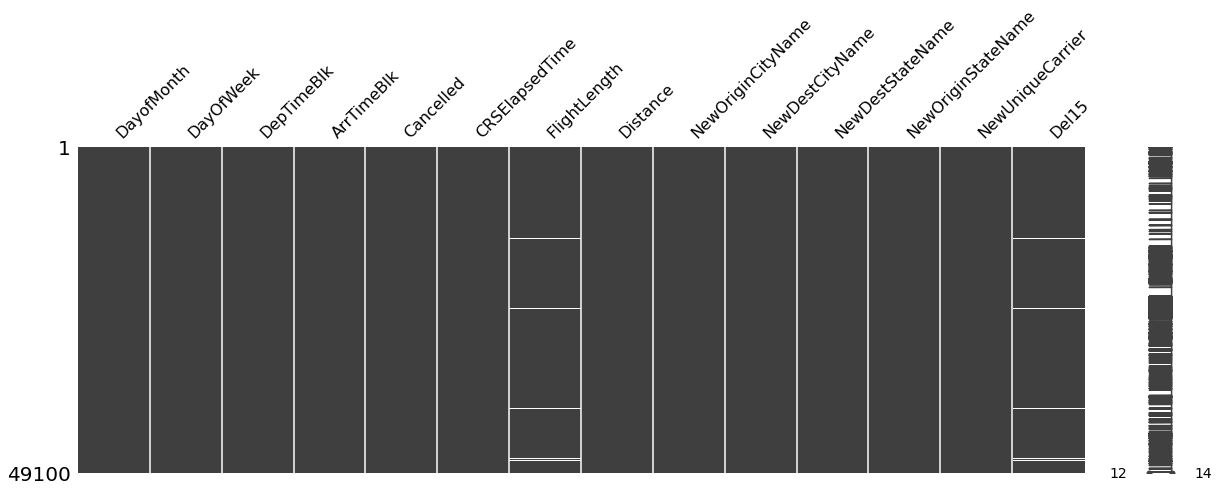

In [25]:
#missing value matrix
mno.matrix(df, figsize = (20, 6))

In [26]:
imputer = KNNImputer(n_neighbors=4)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [27]:
df = df.astype(int)

D:\Users\Cagri ERBEY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FlightLength'>

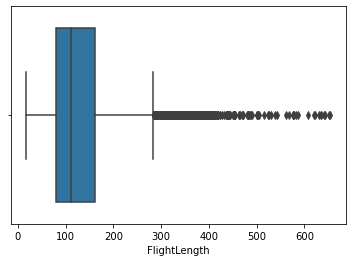

In [28]:
sns.boxplot(df['FlightLength'])

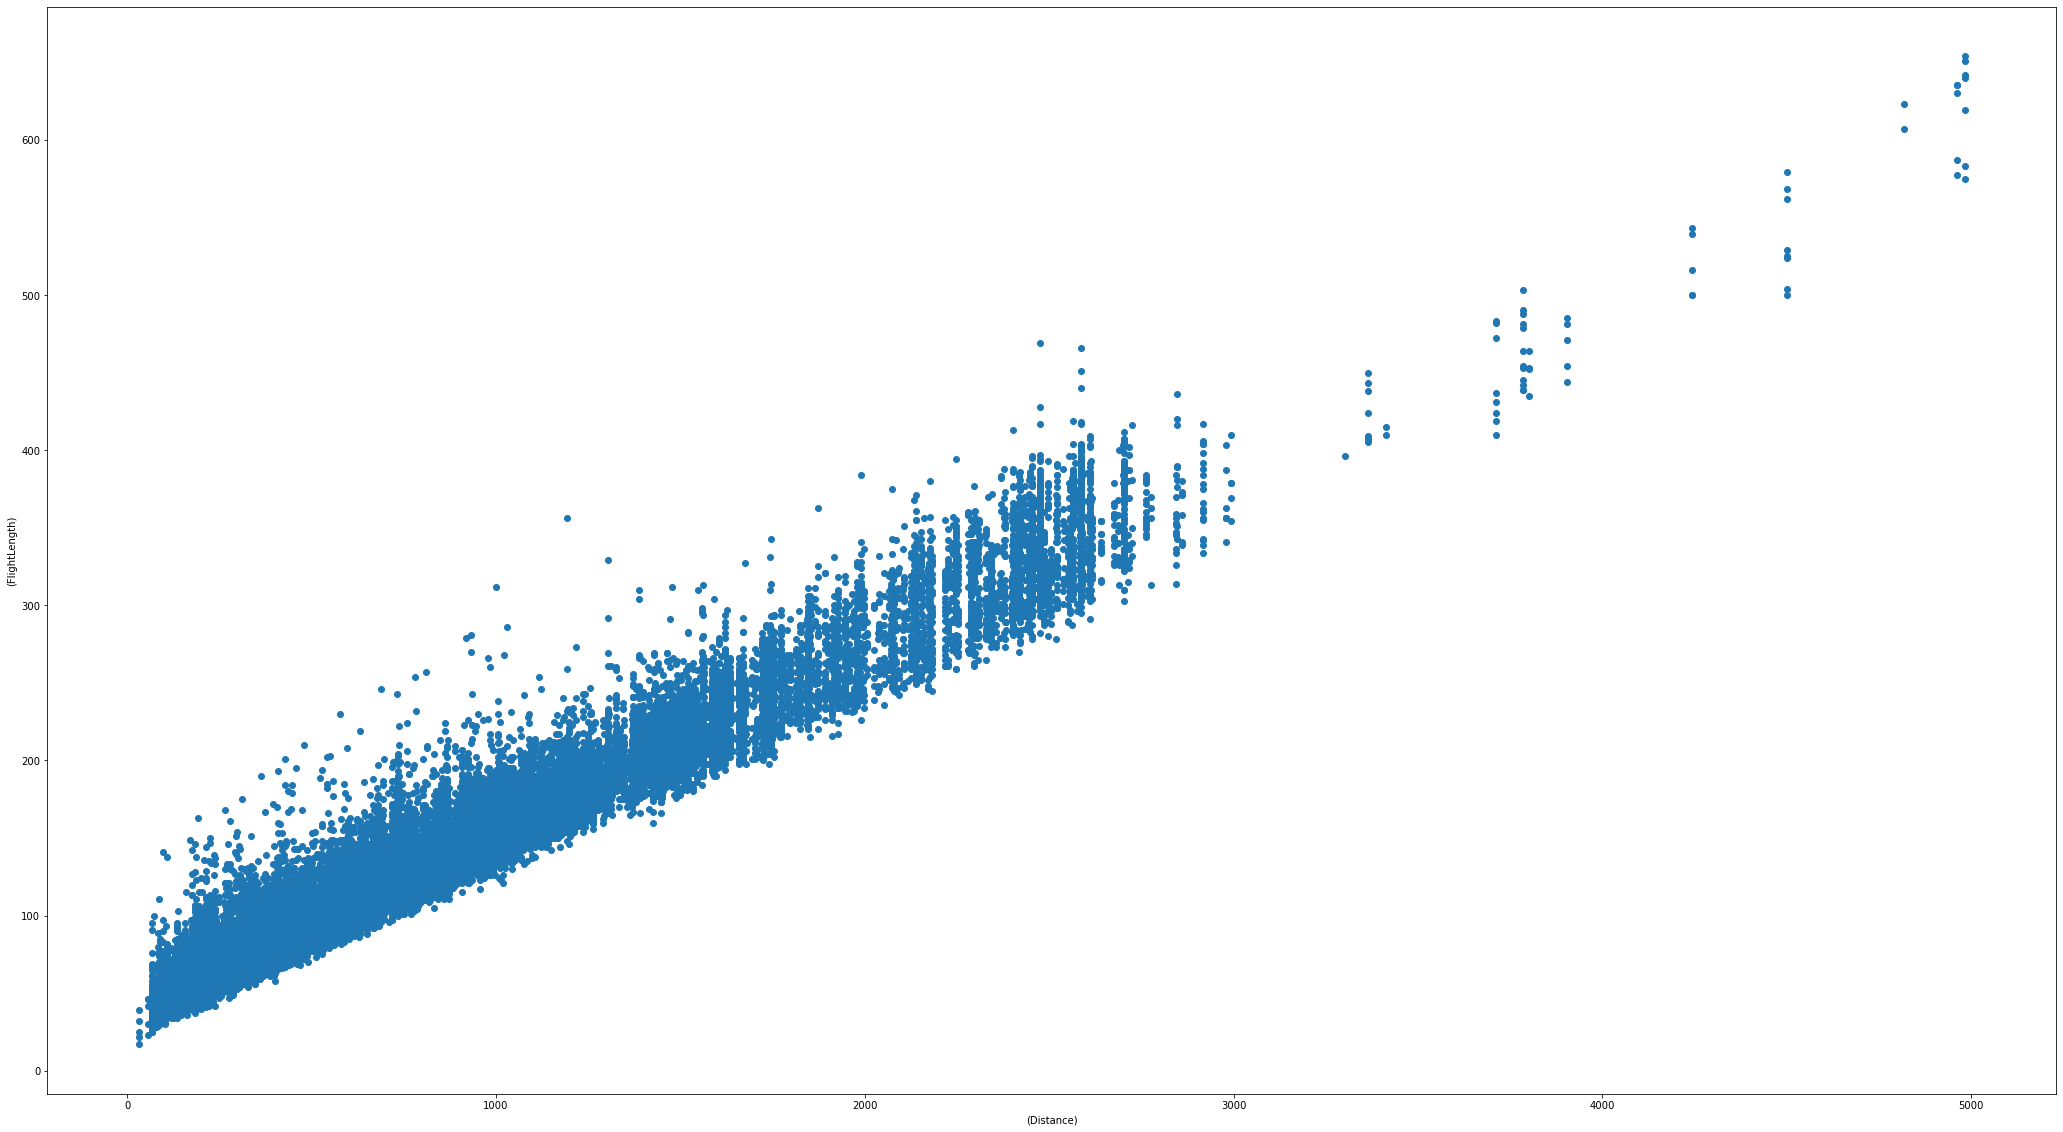

In [29]:
fig, ax = plt.subplots(figsize = (36,20))
ax.scatter(df['Distance'], df['FlightLength'])
 
# x-axis label
ax.set_xlabel('(Distance)')
 
# y-axis label
ax.set_ylabel('(FlightLength)')
plt.show()

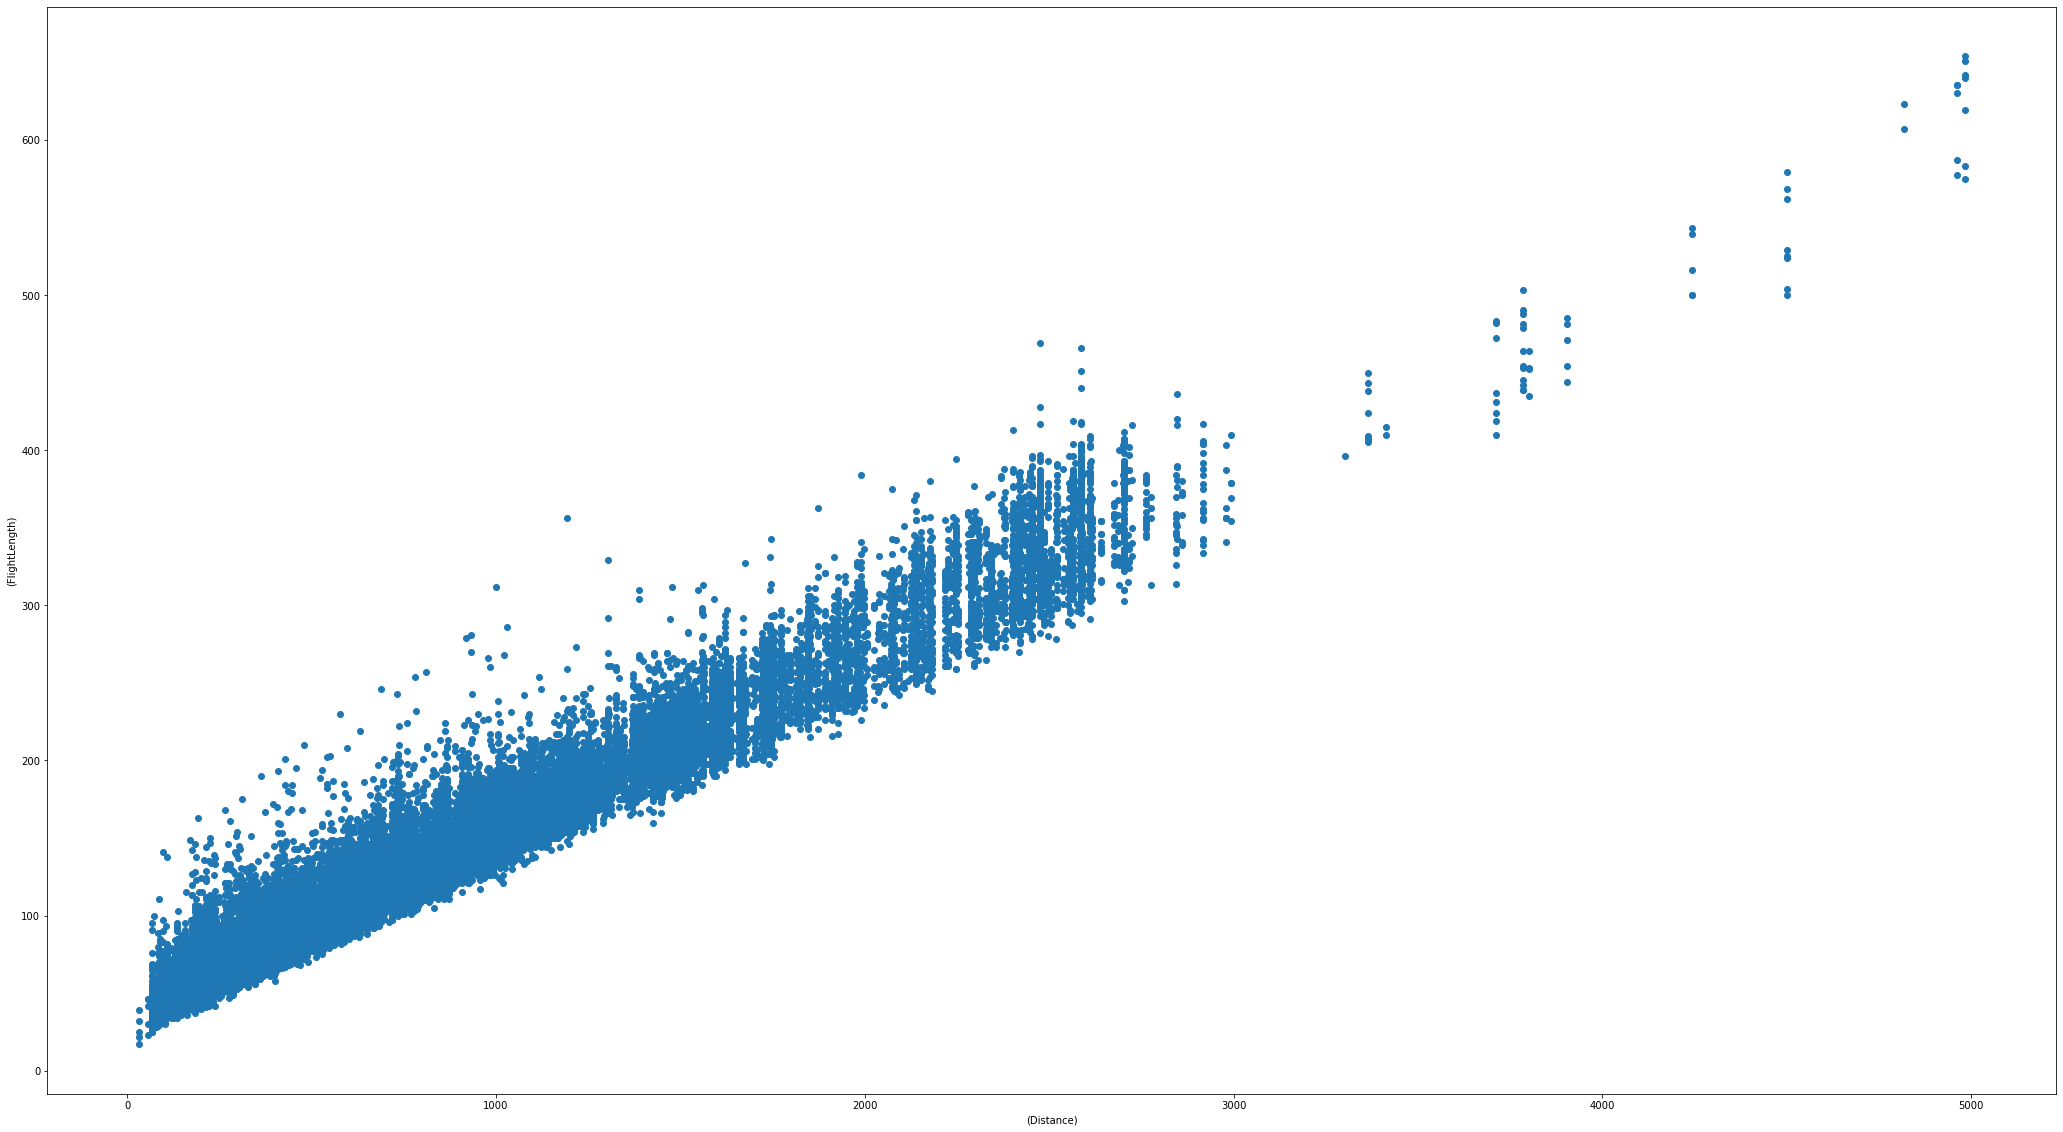

In [30]:
fig, ax = plt.subplots(figsize = (36,20))
ax.scatter(df['Distance'], df['FlightLength'])
 
# x-axis label
ax.set_xlabel('(Distance)')
 
# y-axis label
ax.set_ylabel('(FlightLength)')
plt.show()

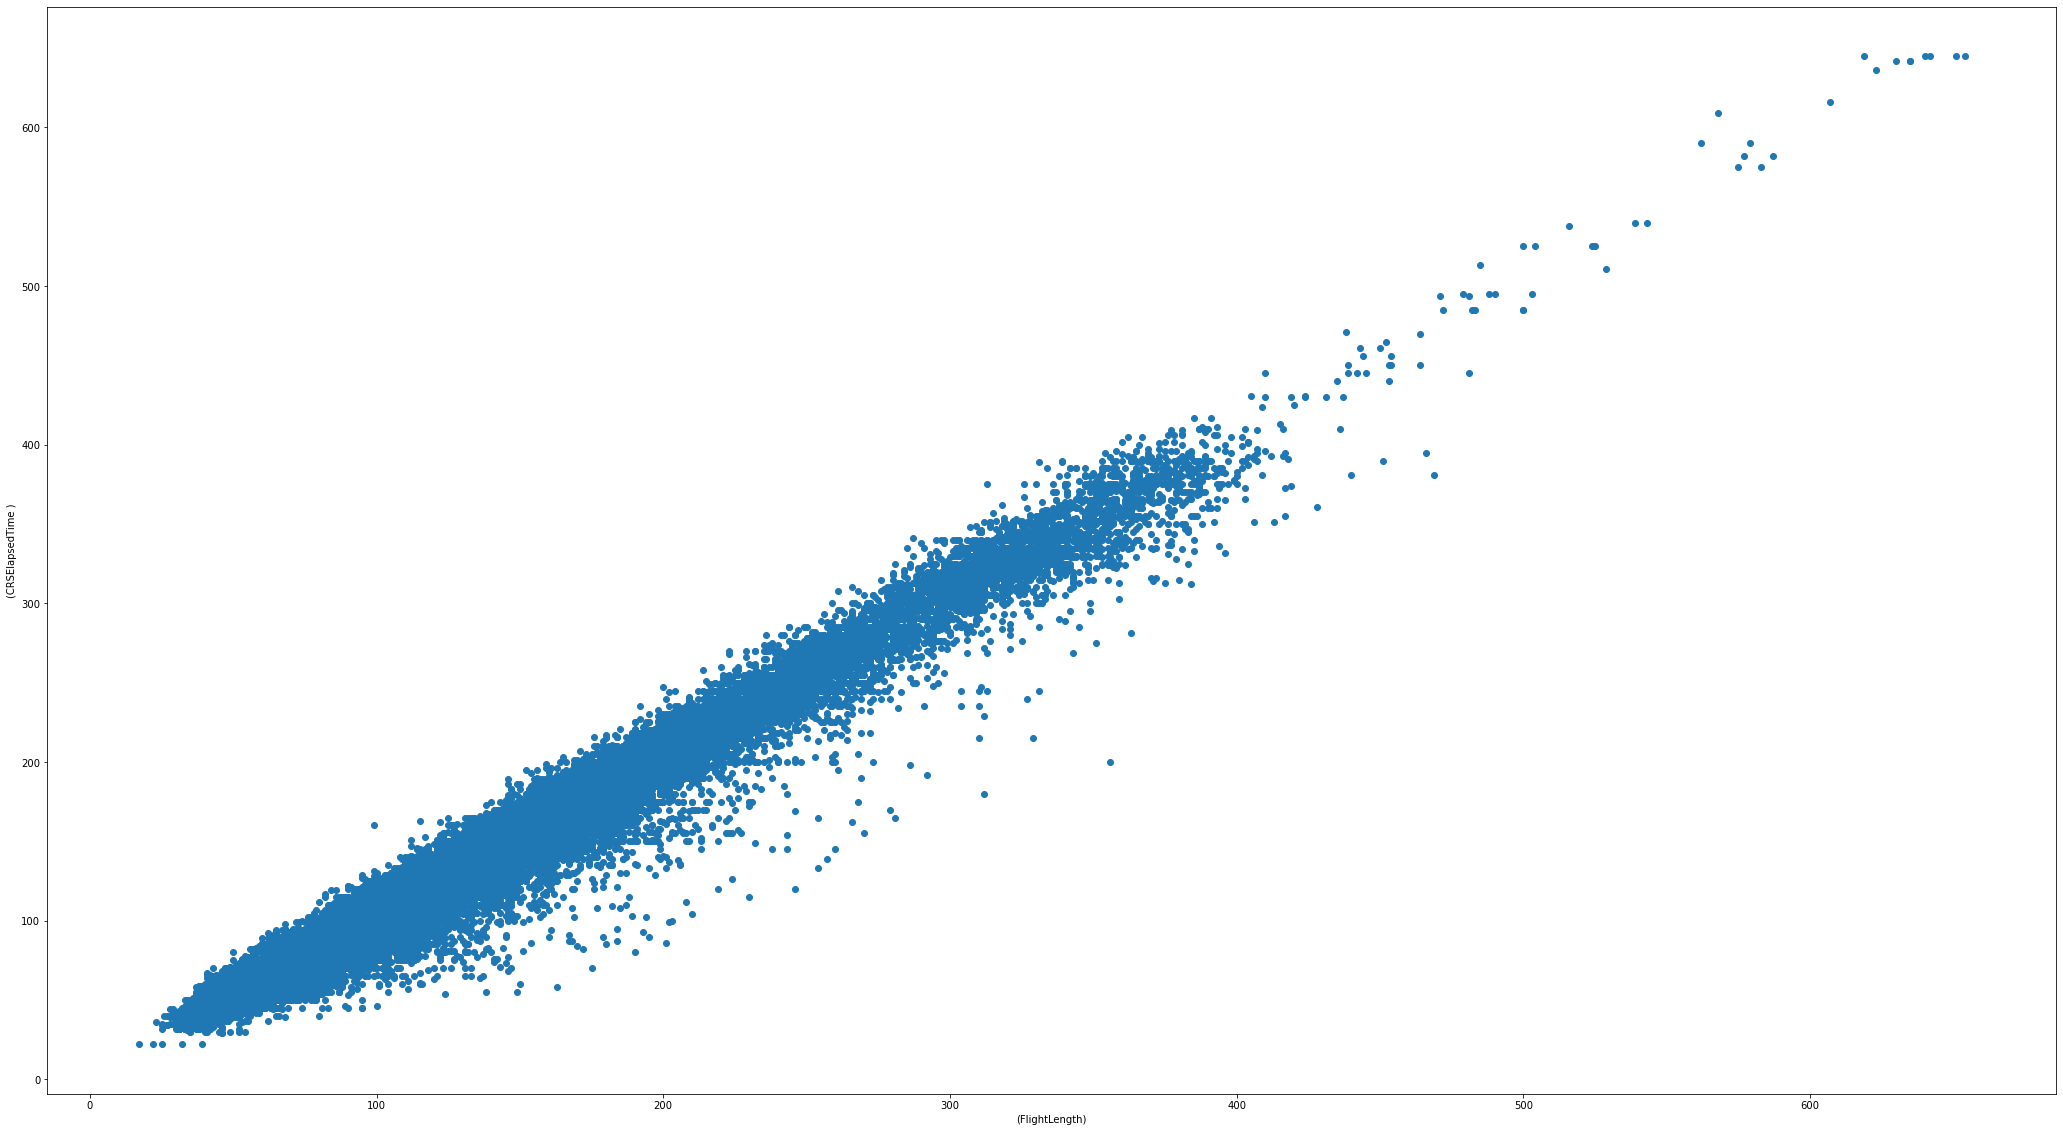

In [31]:
fig, ax = plt.subplots(figsize = (36,20))
ax.scatter(df['FlightLength'], df['CRSElapsedTime'])
 
# x-axis label
ax.set_xlabel('(FlightLength)')
 
# y-axis label
ax.set_ylabel('(CRSElapsedTime )')
plt.show()

In [32]:
#https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
print("Old Shape: ", df.shape)
Q1 = np.percentile(df['Distance'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Distance'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = np.where(df['Distance'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Distance'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (49100, 14)
New Shape:  (46130, 14)


<ipython-input-32-43d5431af9af>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['Distance'], 25,
<ipython-input-32-43d5431af9af>:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['Distance'], 75,


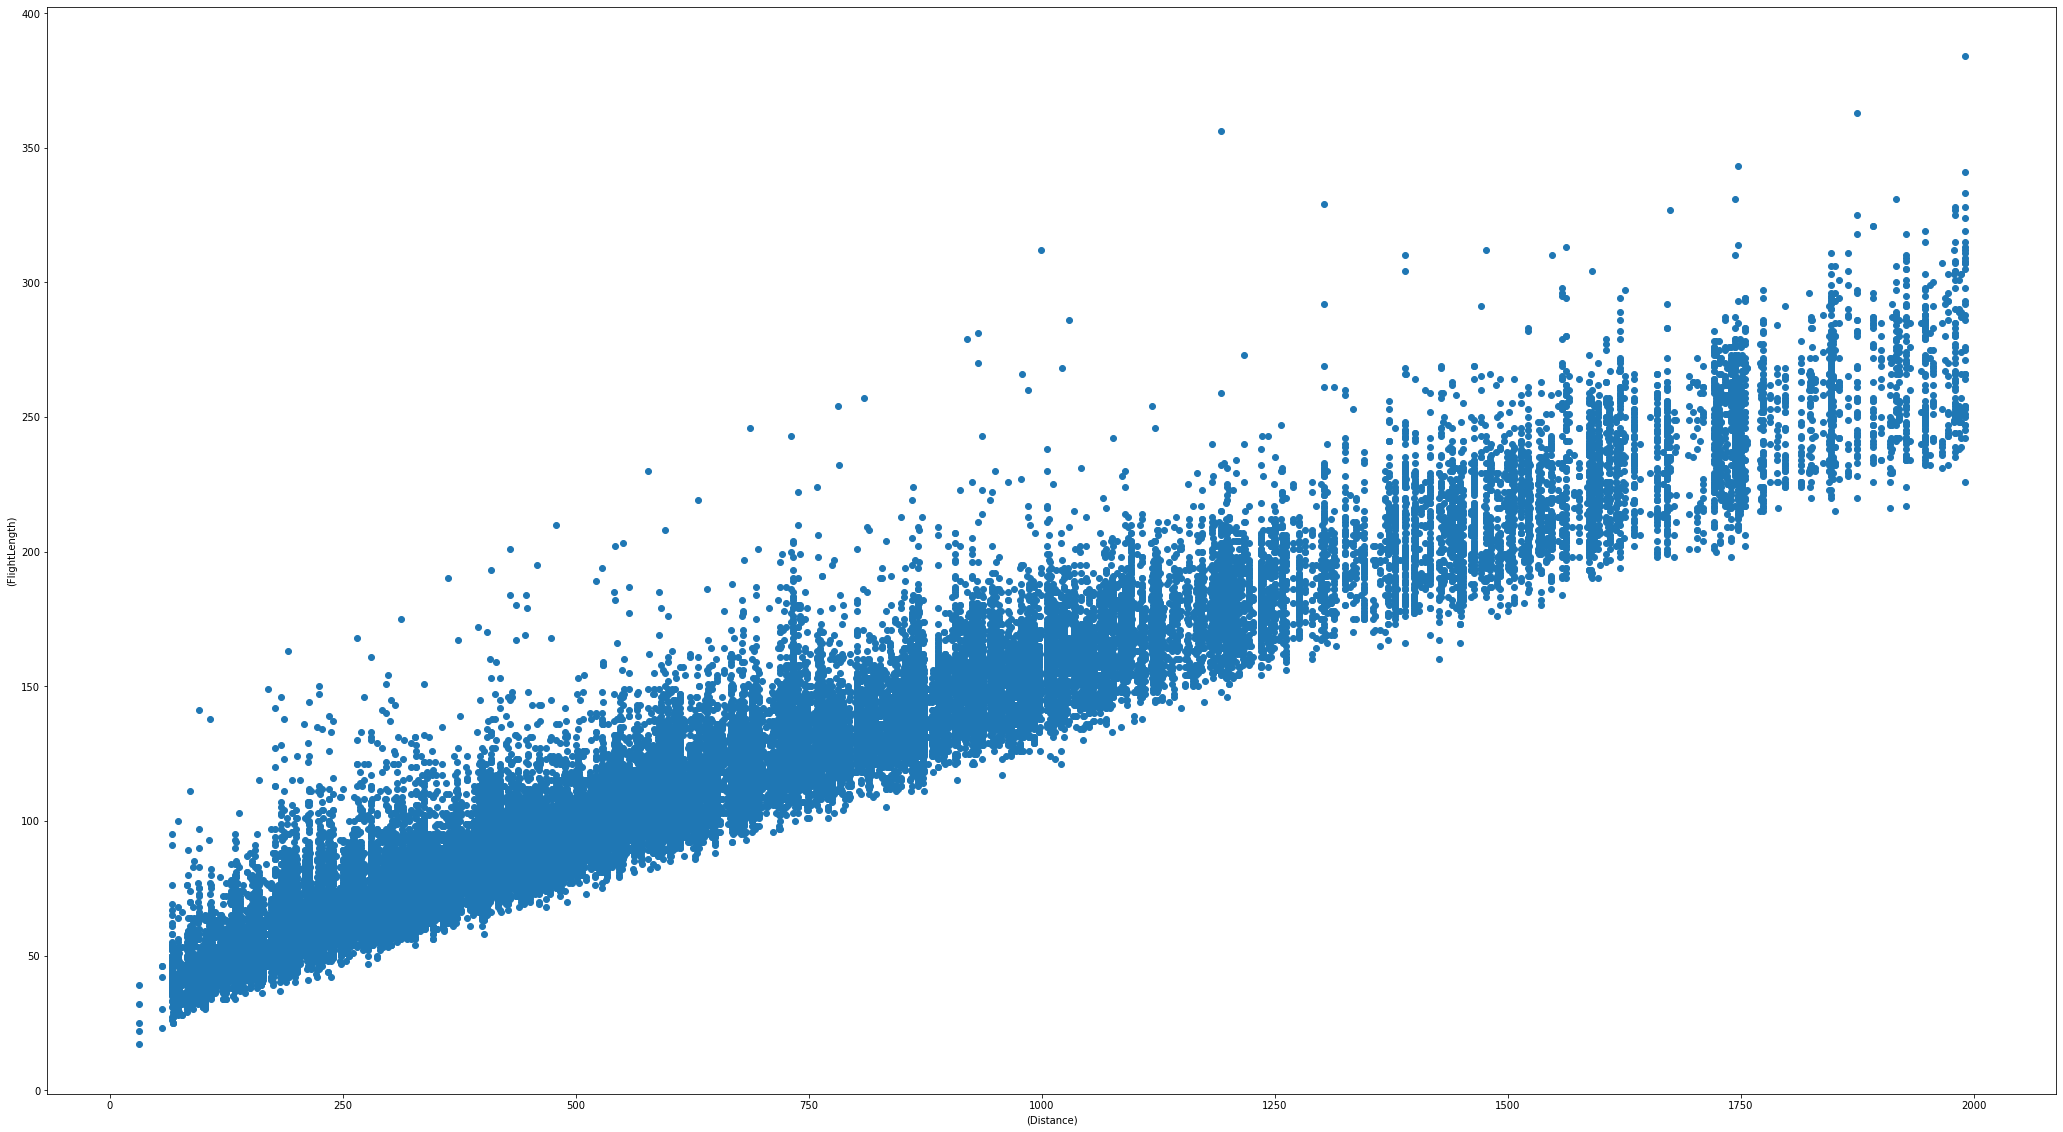

In [33]:
fig, ax = plt.subplots(figsize = (36,20))
ax.scatter(df['Distance'], df['FlightLength'])
 
# x-axis label
ax.set_xlabel('(Distance)')
 
# y-axis label
ax.set_ylabel('(FlightLength)')
plt.show()

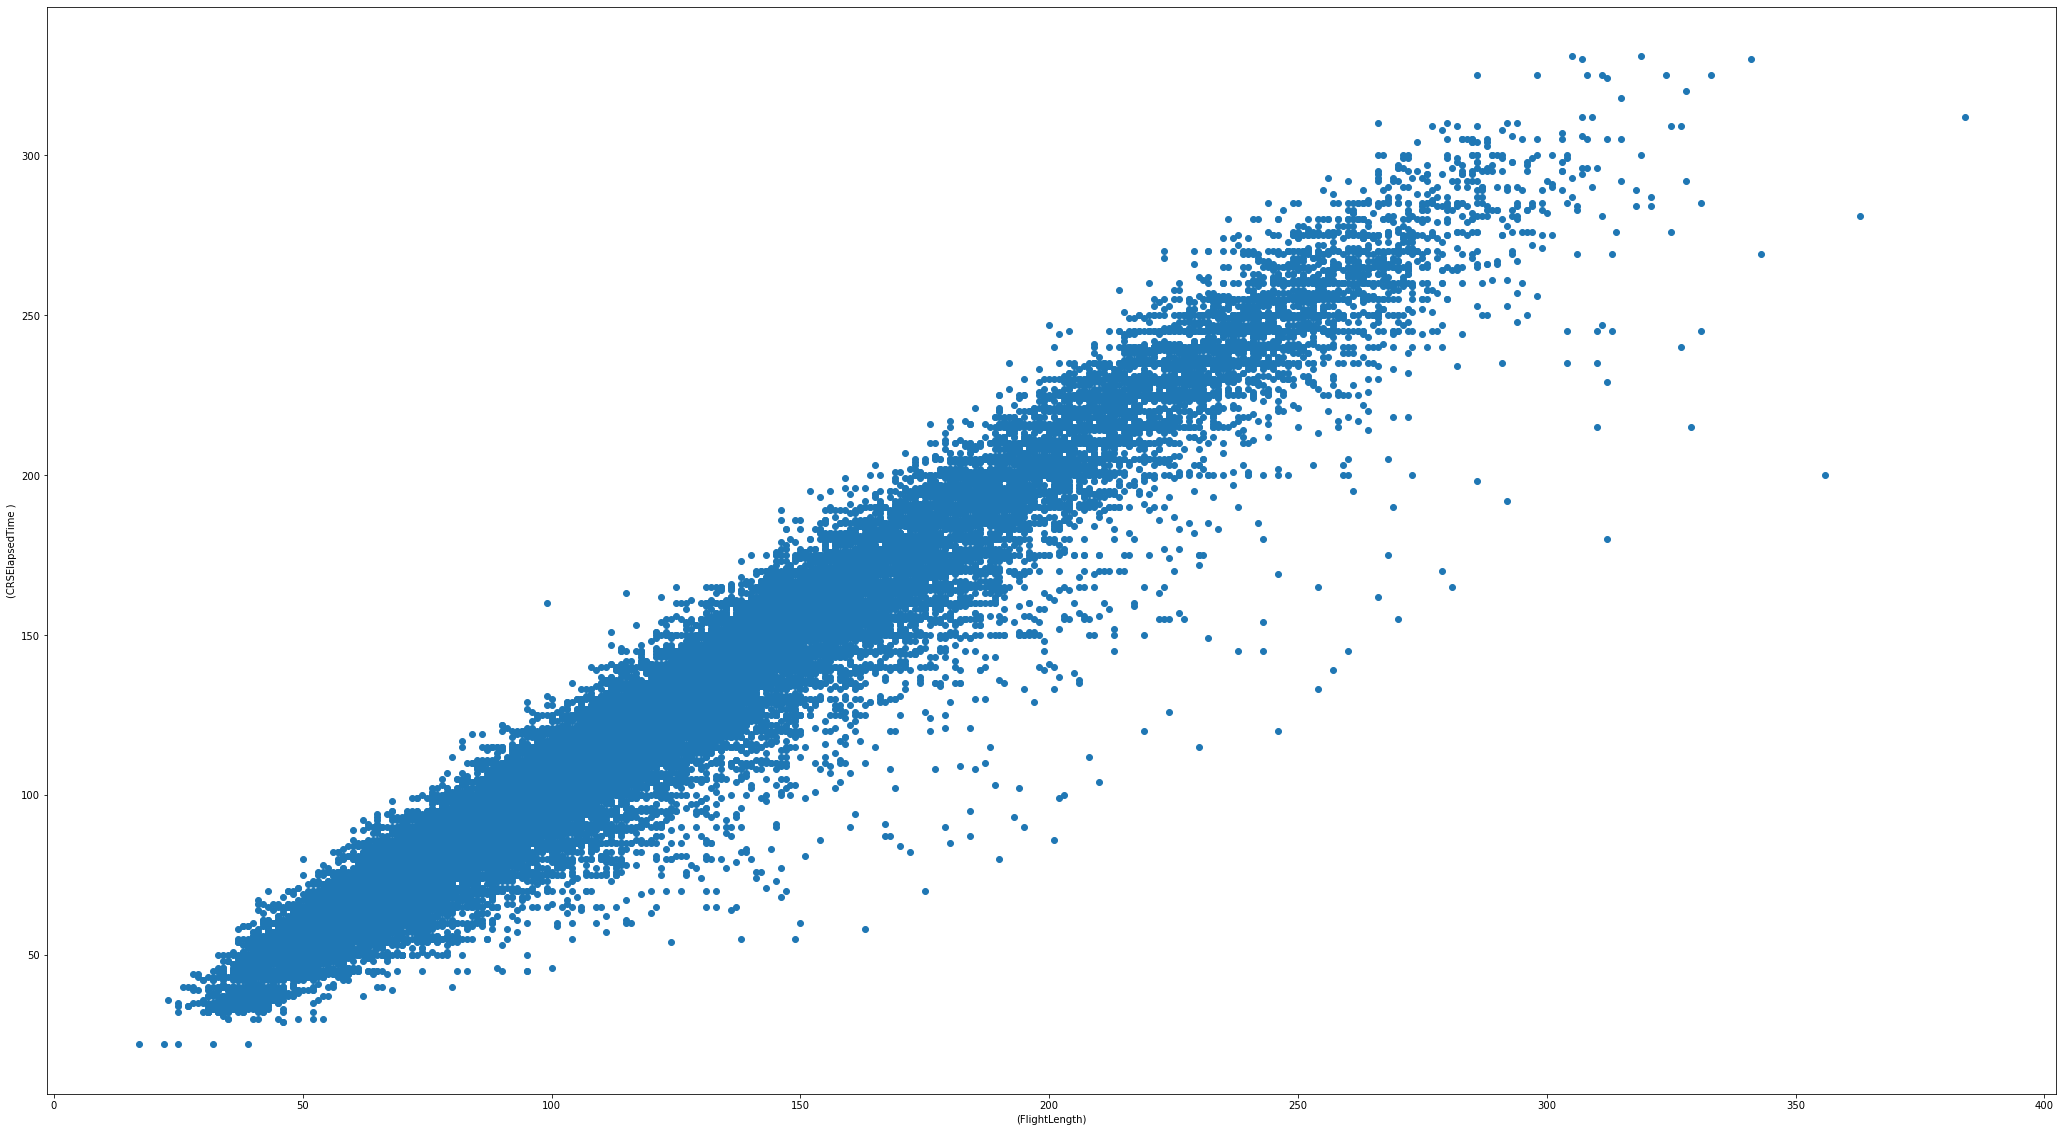

In [34]:
fig, ax = plt.subplots(figsize = (36,20))
ax.scatter(df['FlightLength'], df['CRSElapsedTime'])
 
# x-axis label
ax.set_xlabel('(FlightLength)')
 
# y-axis label
ax.set_ylabel('(CRSElapsedTime )')
plt.show()

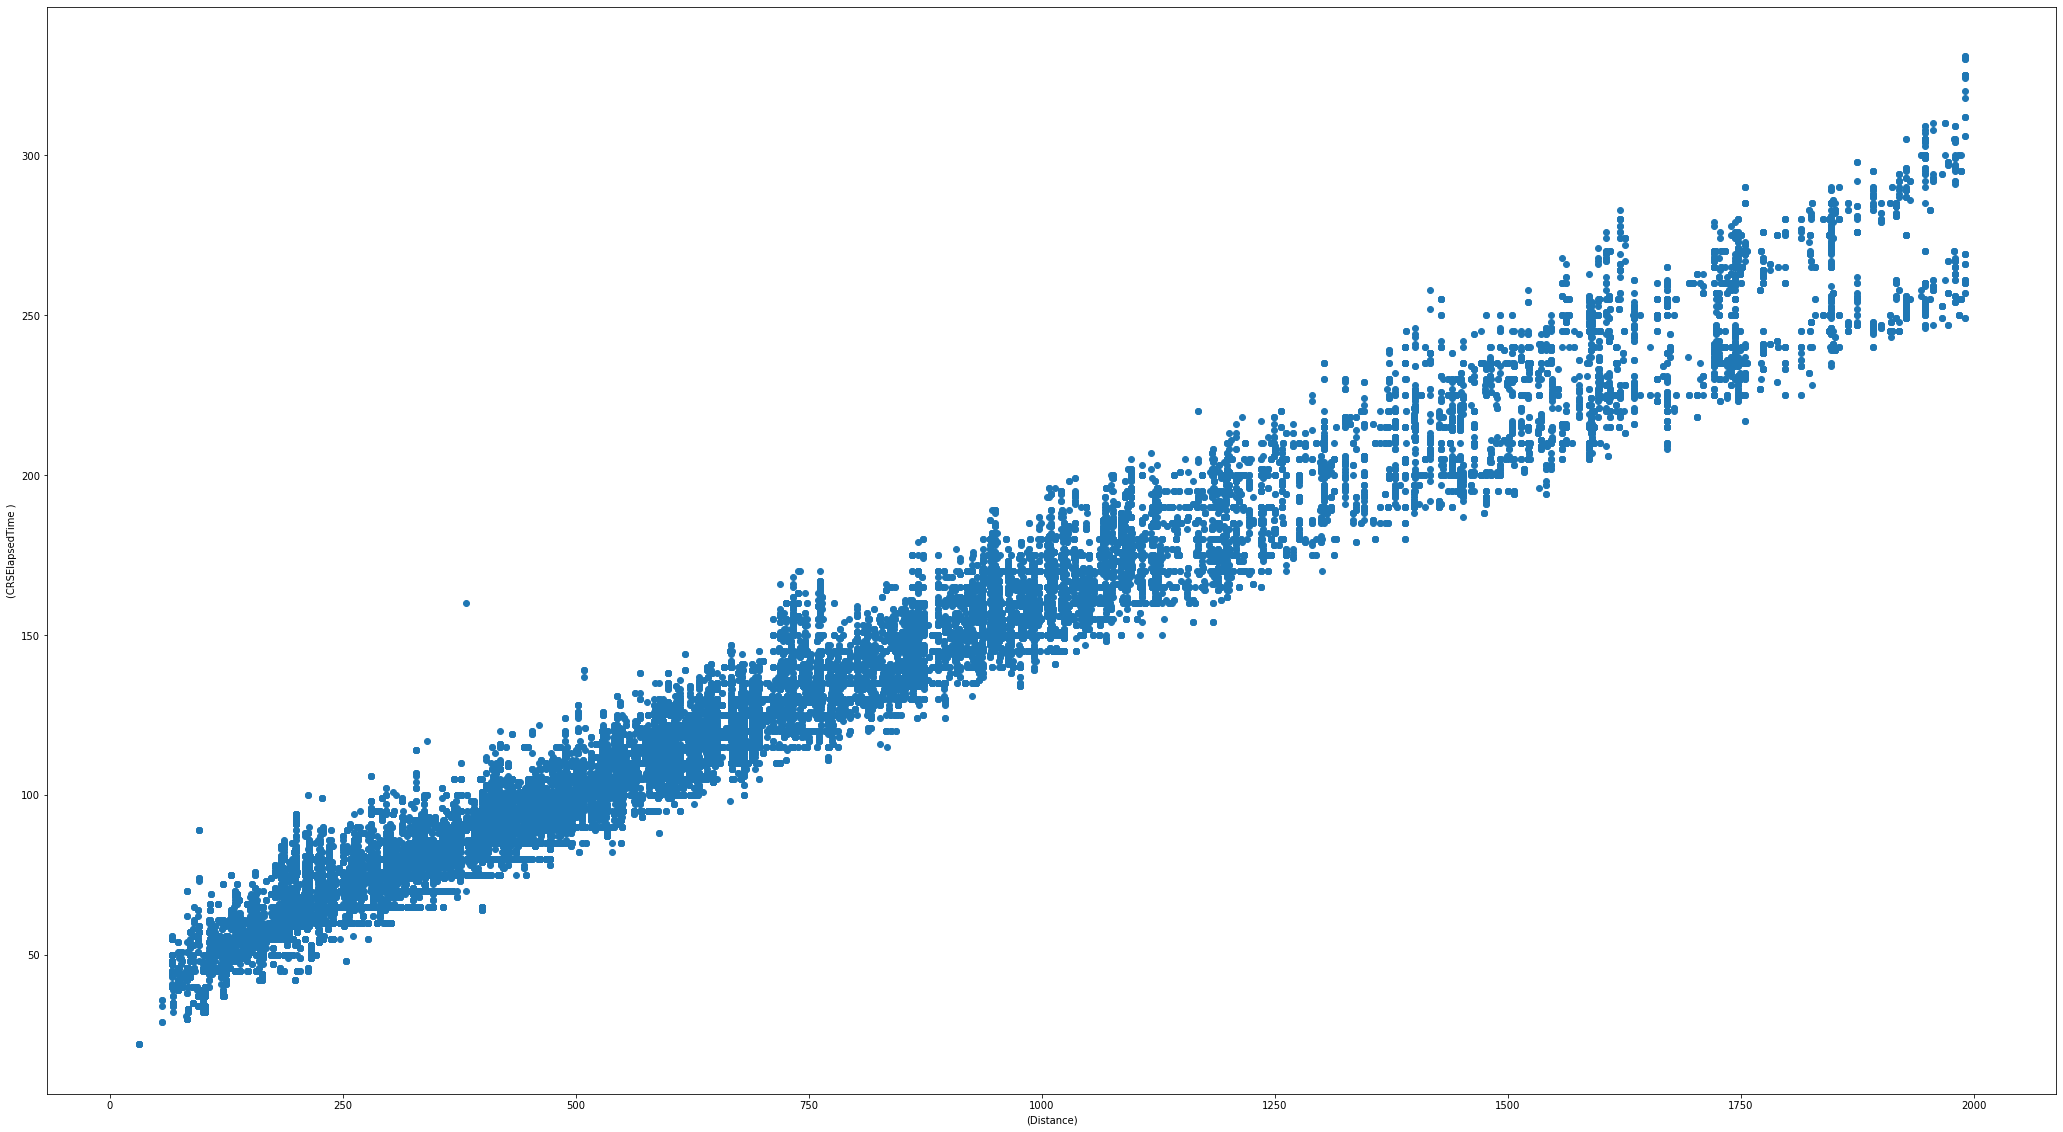

In [35]:
fig, ax = plt.subplots(figsize = (36,20))
ax.scatter(df['Distance'], df['CRSElapsedTime'])
 
# x-axis label
ax.set_xlabel('(Distance)')
 
# y-axis label
ax.set_ylabel('(CRSElapsedTime )')
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46130 entries, 0 to 49099
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   DayofMonth          46130 non-null  int32
 1   DayOfWeek           46130 non-null  int32
 2   DepTimeBlk          46130 non-null  int32
 3   ArrTimeBlk          46130 non-null  int32
 4   Cancelled           46130 non-null  int32
 5   CRSElapsedTime      46130 non-null  int32
 6   FlightLength        46130 non-null  int32
 7   Distance            46130 non-null  int32
 8   NewOriginCityName   46130 non-null  int32
 9   NewDestCityName     46130 non-null  int32
 10  NewDestStateName    46130 non-null  int32
 11  NewOriginStateName  46130 non-null  int32
 12  NewUniqueCarrier    46130 non-null  int32
 13  Del15               46130 non-null  int32
dtypes: int32(14)
memory usage: 2.8 MB


In [37]:
#split dataset in features and target variable
feature_cols = df.columns
X = df[feature_cols] # Features
y = df.Del15 # Target variable

In [38]:
# split X and y into training and testing sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [558]:

# train your model using all data and the best known parameters

# instantiate model with best parameters
knn = KNeighborsClassifier(n_neighbors=7, weights='distance')

# fit with X and y, not X_train and y_train
# even if we use train/test split, we should train on X and y before making predictions on new data
# otherwise we throw away potential valuable data we can learn from
knn.fit(X_train, y_train)

y_pred=knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      3639
           1       0.58      0.25      0.34       974

    accuracy                           0.80      4613
   macro avg       0.70      0.60      0.61      4613
weighted avg       0.77      0.80      0.77      4613



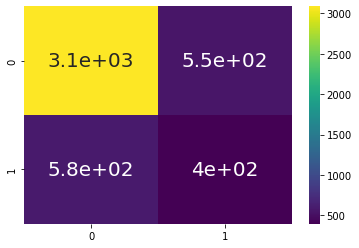

In [559]:
from sklearn.metrics import confusion_matrix
#Before applying best fit k value
clf=KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train,y_train)
predicted_value=clf.predict(X_test)
con_mat=confusion_matrix(y_test,predicted_value)
sns.heatmap(con_mat,annot=True,annot_kws= 
                           {"size":20},cmap="viridis")
plt.show()

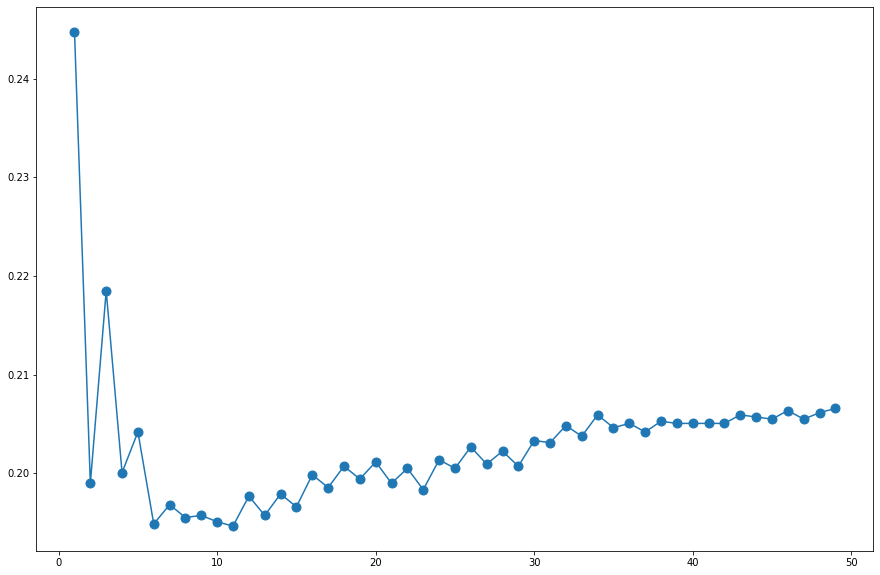

In [560]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

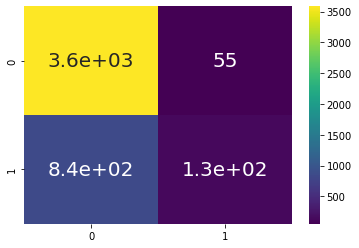

In [561]:
#After applying best fit k value
clf=KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train,y_train)
predicted_value=clf.predict(X_test)
con_mat=confusion_matrix(y_test,predicted_value)
sns.heatmap(con_mat,annot=True,annot_kws= 
                           {"size":20},cmap="viridis")
plt.show()

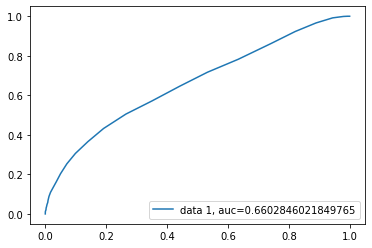

In [562]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [621]:


# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3639
           1       0.69      0.46      0.55       974

    accuracy                           0.84      4613
   macro avg       0.78      0.70      0.73      4613
weighted avg       0.83      0.84      0.83      4613



D:\Users\Cagri ERBEY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [564]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[3433,  206],
       [ 525,  449]], dtype=int64)

In [566]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8415347929763711
Precision: 0.6854961832061068
Recall: 0.46098562628336753


In [567]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3639
           1       0.69      0.46      0.55       974

    accuracy                           0.84      4613
   macro avg       0.78      0.70      0.73      4613
weighted avg       0.83      0.84      0.83      4613



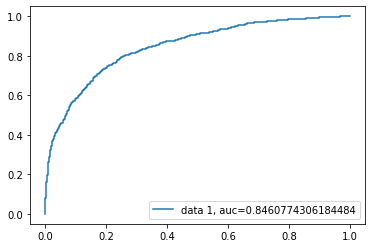

In [568]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [569]:
clf = svm.SVC(kernel='rbf')

In [570]:
clf = svm.SVC()
clf.fit(X, y)

SVC()

In [571]:
y_pr = clf.predict(X_test)
print(y_pr)

[0 0 0 ... 0 0 0]


In [572]:
###Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pr))

Accuracy: 0.7888575764144808


In [574]:
print(classification_report(y_test, y_pr))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      3639
           1       0.00      0.00      0.00       974

    accuracy                           0.79      4613
   macro avg       0.39      0.50      0.44      4613
weighted avg       0.62      0.79      0.70      4613



D:\Users\Cagri ERBEY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Cagri ERBEY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Cagri ERBEY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [619]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression(solver= 'lbfgs')
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.859 (0.018)


In [615]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = KNeighborsClassifier(n_neighbors = 5)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.798 (0.006)


In [614]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = svm.SVC(kernel='poly', C=100.0)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.899 (0.004)


In [584]:

df.loc[(df['NewOriginCityName'] == 'Grand Forks') & (df['NewDestCityName'] == 'Minneapolis')]

,DayofMonth,DayOfWeek,DepTimeBlk,ArrTimeBlk,Cancelled,CRSElapsedTime,FlightLength,Distance,NewOriginCityName,NewDestCityName,NewDestStateName,NewOriginStateName,NewUniqueCarrier,Del15


In [53]:


knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(X_train, y_train)
    
y_pred=knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      3639
           1       0.70      0.13      0.22       974

    accuracy                           0.80      4613
   macro avg       0.76      0.56      0.56      4613
weighted avg       0.79      0.80      0.75      4613



In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      3639
           1       0.70      0.13      0.22       974

    accuracy                           0.80      4613
   macro avg       0.76      0.56      0.56      4613
weighted avg       0.79      0.80      0.75      4613



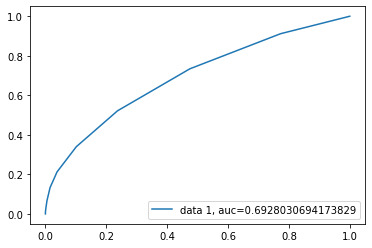

In [50]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [611]:
sigmoid_svc=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3639
           1       1.00      0.54      0.70       974

    accuracy                           0.90      4613
   macro avg       0.95      0.77      0.82      4613
weighted avg       0.91      0.90      0.89      4613

